In [ ]:
#this may be necessary
pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [159]:
#URL to the dataset
url = "https://raw.githubusercontent.com/hyaneva/IS362_Week8/main/auto-mpg.data"

#Defines column names
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
                "acceleration", "model_year", "origin", "car_name"]

#Loads the dataset with correct delimiter handling
data = pd.read_csv(url, delim_whitespace=True, names=column_names)
df = pd.DataFrame(data)
display(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [160]:
#Checks if value in horsepower is ? and if there are any missing values
print(df.loc[[32]])
print(df.isnull().sum())

     mpg  cylinders  displacement horsepower  weight  acceleration  \
32  25.0          4          98.0          ?  2046.0          19.0   

    model_year  origin    car_name  
32          71       1  ford pinto  
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [161]:
#Replaces '?' in horsepower with NaN
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

#Once again checks if value in horsepower is ? or NaN and if there are any missing values. 
#We need the ? to become missing values
print(df.loc[[32]])
print(df.isnull().sum())


     mpg  cylinders  displacement  horsepower  weight  acceleration  \
32  25.0          4          98.0         NaN  2046.0          19.0   

    model_year  origin    car_name  
32          71       1  ford pinto  
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [162]:
#Converts the origin column values 1, 2, and 3 respectively to ‘USA’, ‘Asia’, and ‘Europe’
data['origin'] = data['origin'].replace({1: 'USA', 2: 'Asia', 3: 'Europe'})

#Shows last 5 rows to see if the replacement worked
display(data.tail())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,Asia,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA,chevy s-10


[]

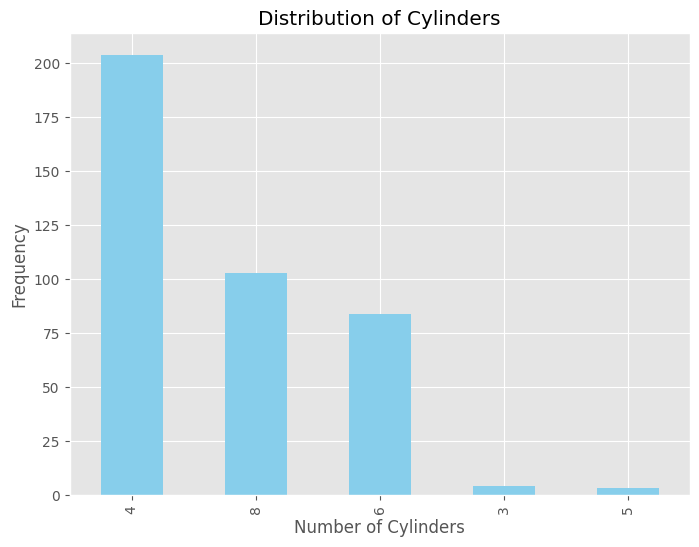

In [164]:
#Creates a bar chart to show the distribution of 'cylinders'
#Makes chart bigger
plt.figure(figsize=(8, 6))

#Uses the "ggplot" style, which adjusts the style to emulate ggplot - a popular plotting package for R language.
plt.style.use('ggplot')

data['cylinders'].value_counts().plot(kind='bar', color='skyblue')

#Adds title and labels
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')


#Shows the plot
plt.plot()

[]

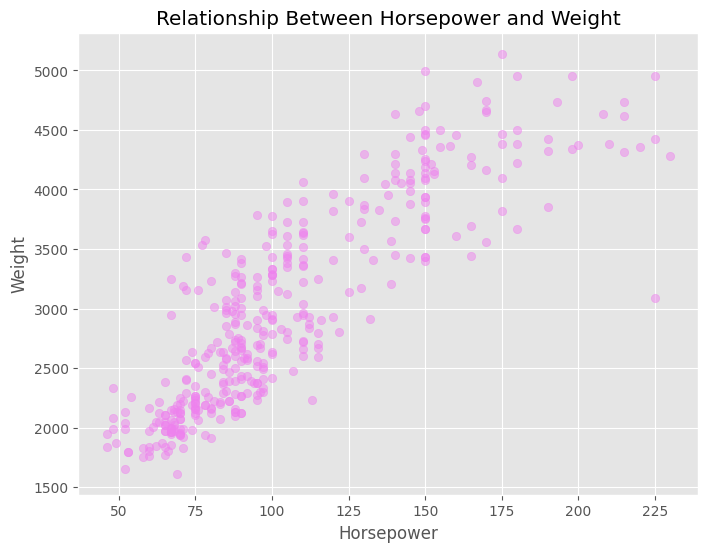

In [165]:
#Creates a scatterplot for horsepower vs. weight
plt.figure(figsize=(8, 6))
plt.scatter(data['horsepower'], data['weight'], color='violet', alpha=0.5)

#Adds title and labels
plt.title('Relationship Between Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')

#Shows the plot
plt.plot()

## An interesting question: Is there a relationship between car weight and fuel efficiency (mpg) for different car origins (USA, Asia, Europe)? Can we observe any trends in weight and mpg within each origin?


This can be answered by creating a scatterplot of weight vs. mpg for each origin, and adding a separate trendline for each origin group. I will use Seaborn to create the scatterplot and trendline, grouped up by origin. The sns.lmplot() function will allow us to plot a scatterplot with a regression line for each group.

[]

<Figure size 800x600 with 0 Axes>

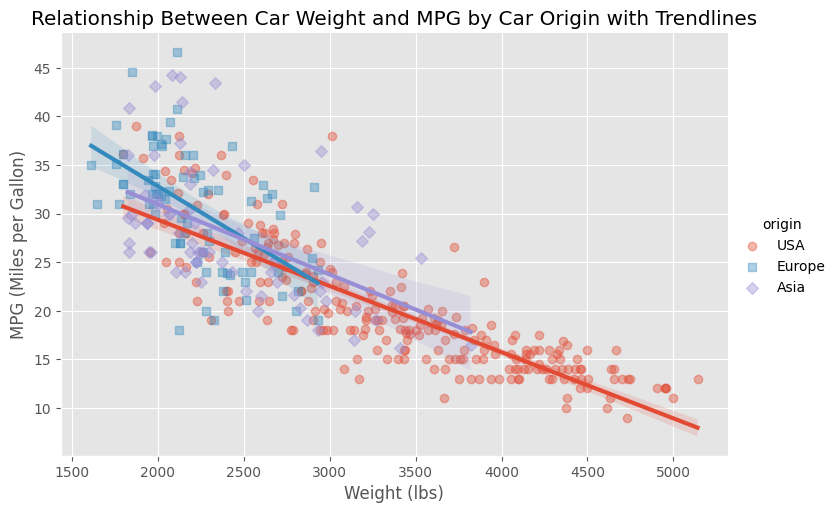

In [174]:
#Creates a scatterplot with trendlines for weight vs mpg, grouped by origin
plt.figure(figsize=(8, 6))
sns.lmplot(x='weight', y='mpg', hue='origin', data=data, aspect=1.5, markers=["o", "s", "D"],
           scatter_kws={'alpha': 0.4}, line_kws={'linewidth': 3})

#Adds title and labels
plt.title('Relationship Between Car Weight and MPG by Car Origin with Trendlines')
plt.xlabel('Weight (lbs)')
plt.ylabel('MPG (Miles per Gallon)')

#Shows the plot
plt.plot()

## Conclusion:
A lot of interesting things can be observed from this scatterplot - it reveals clear regional trends in the relationship between car weight and fuel efficiency.

It can be observed that the heaviest vehicles mostly originate from the United States (which should be obvious to anyone who has ever been to the country), and might be explained by American car culture's preference for larger vehicles. Heavier cars usually have lower fuel efficiency, and this is demonstrated in the scatterplot, where it can be seen that the heaviest cars have the highest fuel consumption. 

The trendlines for USA and Asia are nearly parallel, but the one for Europe sees a steep decline for fuel efficiency once the cars start getting heavier, indicating that European manufacturers have focused more on smaller, more fuel-efficient vehicles, and have not prioritized producing larger, fuel-efficient models as much as manufacturers in the USA. It's likely that the difference lies in regional preferences, regulations and limitations.

Asia, and especially Europe, seem to mainly lean towards light vehicles, which can be explained by many different factors. For example, in Europe, many cities have been built preceding the invention of cars, which means that the streets are smaller, more winding, and less engineered for automobiles, thus requiring smaller cars. 

Not just that, but Europe is smaller and people do not drive as much as they do in America, which is a car-centric country. It can also be explained by cultural differences between the regions, with the sentiment of "bigger is better" being prevalent in America, due to consumers prioritizing comfort and space, for example. Alternatively, aside from similar other reasons as in Europe, countries in Asia can be more densely populated, requiring the cars to be smaller and more easily maneuverable.

Overall, this scatterplot demonstrates that there is a significant relationship and difference between car size and fuel efficiency across the three regions. 

Dataset:
Quinlan, R. (1993). Auto MPG [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5859H.